In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [2]:
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

C:\Users\Jimit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jimit\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
full_df = train_df.append(test_df, ignore_index = True)
print('Train: ',train_df.shape,'Test: ',test_df.shape,'Full: ',full_df.shape)

Train:  (891, 12) Test:  (418, 11) Full:  (1309, 12)


In [5]:
full_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moran, Miss. Bertha",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['Sex','Survived']].groupby('Sex').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


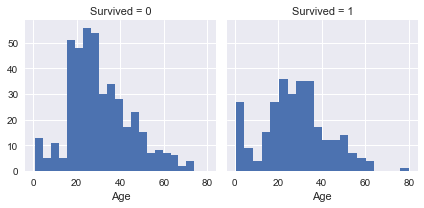

In [14]:
g = sns.FacetGrid(train_df,col = 'Survived')
g.map(plt.hist,'Age',bins = 20)

In [15]:
full_df = full_df.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [16]:
full_df.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0


In [17]:
full_df['Sex'] = full_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
full_df.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0


In [19]:
embarked = pd.get_dummies( full_df.Embarked , prefix='Embarked')

In [20]:
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
full_df.Age = full_df.Age.fillna(full_df.Age.mean())
full_df.Fare = full_df.Fare.fillna(full_df.Fare.mean())

In [22]:
full_df.head(10)

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.000000,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0
1,38.000000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0
2,26.000000,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0
3,35.000000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0
4,35.000000,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0
5,29.881138,Q,8.4583,"Moran, Mr. James",0,3,0,0,0.0
6,54.000000,S,51.8625,"McCarthy, Mr. Timothy J",0,1,0,0,0.0
7,2.000000,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,0,3,0.0
8,27.000000,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,1,0,1.0
9,14.000000,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,1,1,1.0


In [23]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full_df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [24]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full_df[ 'Parch' ] + full_df[ 'SibSp' ] + 1
family.head()

,FamilySize
0,2
1,2
2,1
3,2
4,1


In [25]:
full_df = full_df.drop(['Name','Survived'],axis=1)
full_df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,0,1
1,38.0,C,71.2833,0,1,1,1
2,26.0,S,7.9250,0,3,1,0
3,35.0,S,53.1000,0,1,1,1
4,35.0,S,8.0500,0,3,0,0


In [26]:
created_features = pd.concat([embarked, title, family], axis = 1)
created_features.head()

,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Officer,Royalty,FamilySize
0,0,0,1,0,0,1,0,0,0,2
1,1,0,0,0,0,0,1,0,0,2
2,0,0,1,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,2
4,0,0,1,0,0,1,0,0,0,1


In [27]:
final_df = pd.concat([full_df, created_features], axis = 1)
final_df = final_df.drop(['Embarked'],axis=1)
final_df.head(10)

,Age,Fare,Parch,Pclass,Sex,SibSp,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Officer,Royalty,FamilySize
0,22.000000,7.2500,0,3,0,1,0,0,1,0,0,1,0,0,0,2
1,38.000000,71.2833,0,1,1,1,1,0,0,0,0,0,1,0,0,2
2,26.000000,7.9250,0,3,1,0,0,0,1,0,1,0,0,0,0,1
3,35.000000,53.1000,0,1,1,1,0,0,1,0,0,0,1,0,0,2
4,35.000000,8.0500,0,3,0,0,0,0,1,0,0,1,0,0,0,1
5,29.881138,8.4583,0,3,0,0,0,1,0,0,0,1,0,0,0,1
6,54.000000,51.8625,0,1,0,0,0,0,1,0,0,1,0,0,0,1
7,2.000000,21.0750,1,3,0,3,0,0,1,1,0,0,0,0,0,5
8,27.000000,11.1333,2,3,1,0,0,0,1,0,0,0,1,0,0,3
9,14.000000,30.0708,0,2,1,1,1,0,0,0,0,0,1,0,0,2


In [28]:
# Create all datasets that are necessary to train, validate and test models
train_X = final_df[ 0:891 ]
train_y = train_df.Survived
test_X = final_df[ 891: ]
#train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

#print (final_df.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)


## Logistic Regression Model ##

In [29]:
logreg = LogisticRegression()
cross_logreg_score = cross_val_score(logreg, train_X, train_y, cv=10, scoring='accuracy')
logreg_score = cross_logreg_score.mean()
print(logreg_score)

0.82603875837


## K-Nearest Neighbors Model ##

In [30]:
k_range = list(range(1,11))
weight_options = ['uniform','distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
knn_grid.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [31]:
knn_score = knn_grid.best_score_
print(knn_score)
print(knn_grid.best_params_)

0.7429854096520763
{'n_neighbors': 8, 'weights': 'distance'}


## Support Vector Machine Model##

In [32]:
svc = SVC()
cross_svc_score = cross_val_score(svc, train_X, train_y, cv=10, scoring='accuracy')
svc_score = cross_svc_score.mean()
print(svc_score)

0.752255703098


## Decision Tree Model ##

In [33]:
decision_tree = DecisionTreeClassifier()
cross_decision_tree_score = cross_val_score(decision_tree, train_X, train_y, cv=10, scoring='accuracy')
decision_tree_score = cross_decision_tree_score.mean()
print(decision_tree_score)

0.775575417092


## Random Forest Model ##

In [34]:
estimator_range = list(range(1,21))
param_grid = dict(n_estimators = estimator_range)
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, param_grid, cv = 10, scoring = 'accuracy')
random_forest_grid.fit(train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [35]:
random_forest_score = random_forest_grid.best_score_
print(random_forest_score)
print(random_forest_grid.best_params_)

0.8181818181818182
{'n_estimators': 14}


## Gaussian Naive Bayes Model ##

In [36]:
gaussian = GaussianNB()
cross_gaussian_score = cross_val_score(gaussian, train_X, train_y, cv=10, scoring='accuracy')
gaussian_score = cross_gaussian_score.mean()
print(gaussian_score)

0.811456418114


## Perceptron Model ##

In [37]:
perceptron = Perceptron()
cross_perceptron_score = cross_val_score(perceptron, train_X, train_y, cv=10, scoring='accuracy')
perceptron_score = cross_perceptron_score.mean()
print(perceptron_score)

0.554547156963


## Linear SVC Model ##

In [38]:
linear_svc = LinearSVC()
cross_linear_svc_score = cross_val_score(linear_svc, train_X, train_y, cv=10, scoring='accuracy')
linear_svc_score = cross_linear_svc_score.mean()
print(linear_svc_score)

0.787961638861


## Stochastic Gradient Descent Model ##

In [39]:
sgd = SGDClassifier()
cross_sgd_score = cross_val_score(sgd, train_X, train_y, cv=10, scoring='accuracy')
sgd_score = cross_sgd_score.mean()
print(sgd_score)

0.652166609919


In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [svc_score, knn_score, logreg_score, 
              random_forest_score, gaussian_score, perceptron_score, 
              sgd_score, linear_svc_score, decision_tree_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.826039
3,Random Forest,0.818182
4,Naive Bayes,0.811456
7,Linear SVC,0.787962
8,Decision Tree,0.775575
0,Support Vector Machines,0.752256
1,KNN,0.742985
6,Stochastic Gradient Decent,0.652167
5,Perceptron,0.554547


In [41]:
model = logreg.fit(train_X, train_y)
test_y = model.predict(test_X)
passenger_id = test_df.PassengerId
predictions = pd.DataFrame({'PassengerId' : passenger_id, 'Survived' : test_y})
predictions.to_csv( 'titanic_predictions.csv' , index = False )